**Задача:** провести статистический анализ по рядам данных о загрязняющих веществах (подобрать распределения, посмотреть корреляции веществ, статистики по ним и прочее)

In [342]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns 

import itertools

import os
from pathlib import Path

#get my written functions
from userfuncs import prepare_dataframe, find_borders_nan_intervals, count_frequency, count_missing
from userfuncs import get_best_distribution, distribution_by_season

from collections import defaultdict

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [343]:
pd.set_option('display.max_rows', 2000)

In [344]:
from matplotlib import style
style.use('fivethirtyeight')

In [345]:
path_to_data = Path('../../data')
df = pd.read_csv(path_to_data / 'prepared_data_prioksk.csv')
df.head(2)

,TSP,SO2,PB,CD
0,9.0,0.02,21.0,0.54
1,5.0,0.03,20.0,0.53


In [356]:
def get_conf_interval(data, z, std=None):
    if std is None:
        std = np.std(data, ddof=1)
    
    upper_bond = data + z * (std / np.sqrt(len(data)))
    lower_bond = data - z * (std / np.sqrt(len(data)))
    
    return lower_bond, upper_bond
    
def plot_stl_decompose(ts, n, col, z=1.96):
    '''stl decompose and rolling mean'''
    decomp = sm.tsa.seasonal_decompose(ts, model='add', period=365)

    lw = 1.5
    fontsize = 13
    plt.figure(figsize=(10,5))
    plt.plot(decomp.observed, label=f'observed {col}', lw=lw)
    plt.tick_params(labelsize=12)
    #сглаживание
    rolling_mean = ts.rolling(window=n).mean()
    #доверительный интервал
    #rolling_std =  ts.rolling(window=n).std()
    #upper_bond = rolling_mean + z * (rolling_std / np.sqrt(ts.shape[0]))
    #lower_bond = rolling_mean - z * (rolling_std / np.sqrt(ts.shape[0]))
    #plt.plot(upper_bond, "r--", label=f"Confidence interval")
    #plt.plot(lower_bond, "r--")
    plt.plot(rolling_mean, "g", label=f"Rolling mean by {n} days", lw=lw*1.75)
    plt.legend(loc='best', fontsize=fontsize)
    
    plt.figure(figsize=(10,5))
    plt.plot(decomp.trend, label=f'trend {col}', lw=lw)
    plt.legend(loc='best', fontsize=fontsize)
    plt.tick_params(labelsize=12)

    plt.figure(figsize=(10,5))
    plt.plot(decomp.seasonal, label=f'seasonal {col}', lw=lw)
    plt.legend(loc='best', fontsize=fontsize)
    plt.tick_params(labelsize=12)

    #может убрать их?
    plt.figure(figsize=(10,5))
    plt.plot(decomp.resid, label=f'residuals {col}', lw=lw)
    plt.legend(loc='best', fontsize=fontsize)
    plt.tick_params(labelsize=12)

    plt.show()

In [357]:
#n = 7 #сглаживание по неделям
n = 30 #сглаживание по месяцам

### TSP

In [366]:
col='TSP'
ts = df[col]

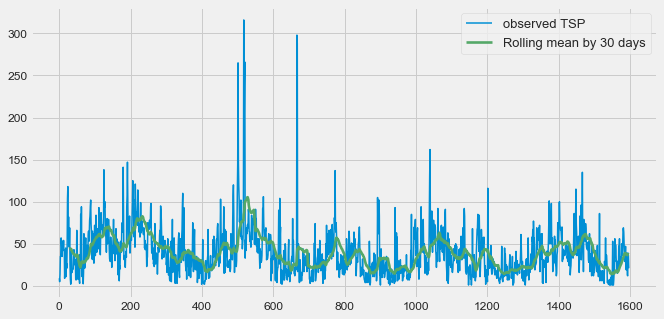

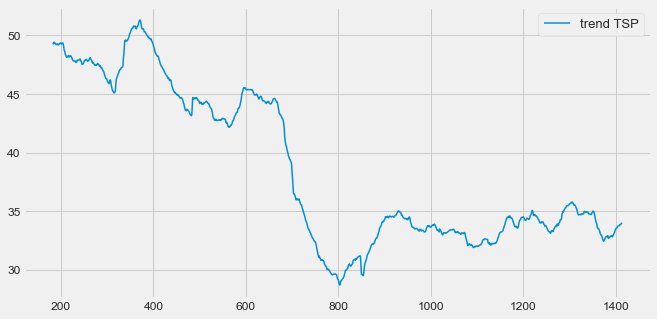

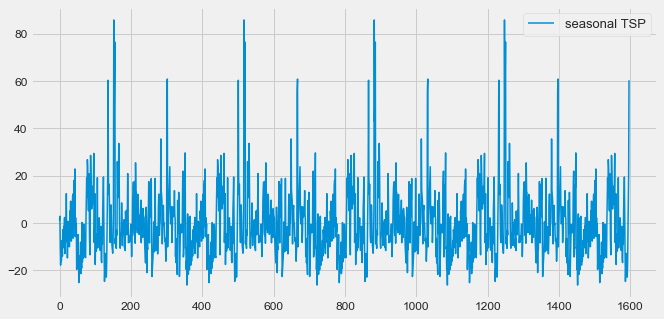

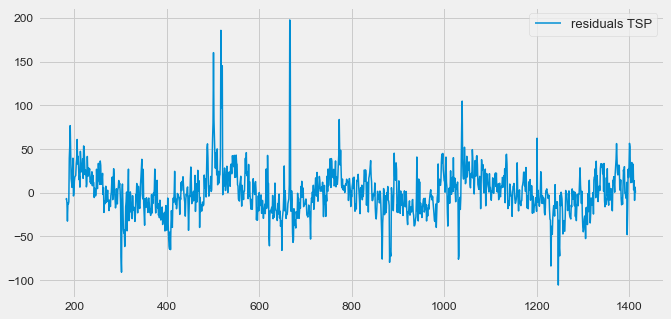

In [359]:
plot_stl_decompose(ts, n, col)


Chi2
Best fitting distribution: gamma
Best p value: 0.5416213995694934
Parameters for the best fit: (1.9767507287158708, -0.20091557077524608, 20.274863895162355)


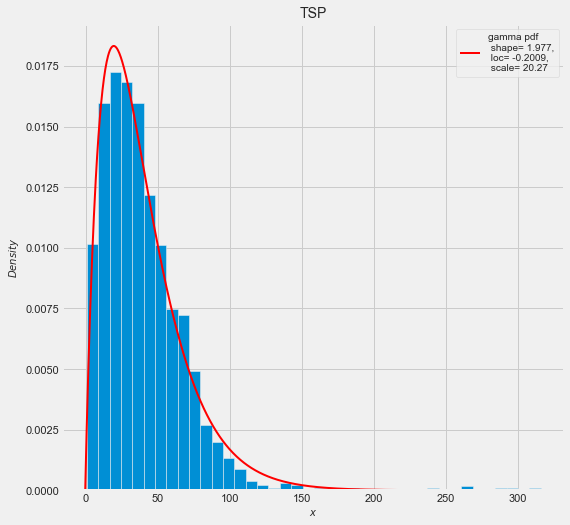

In [315]:
distr_chi2, params_chi2, p_v_chi2 = get_best_distribution(ts)
distr_params_all = defaultdict(dict)
distr_params_all['general'][distr_chi2] = params_chi2
distribution_by_season(df[col], col, distr_params_all['general'])

### SO2

In [381]:
col='SO2'
ts = df[col]

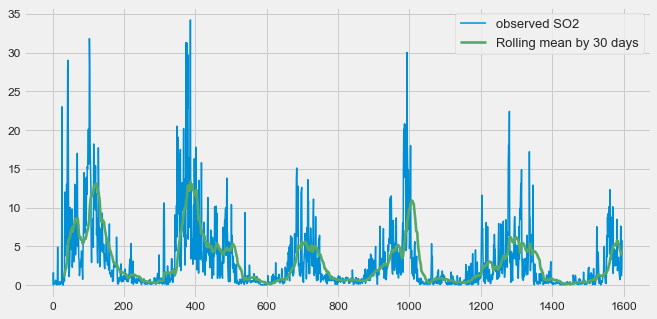

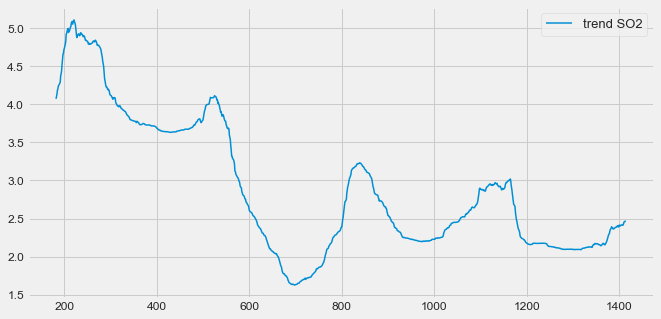

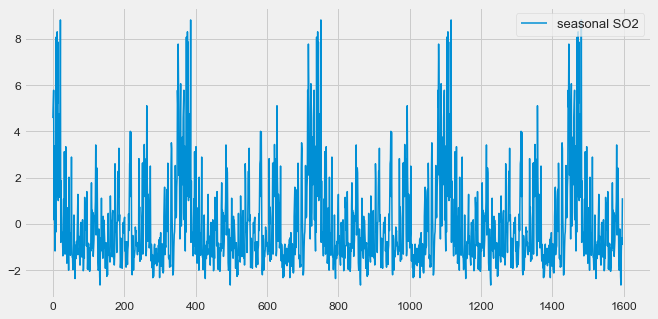

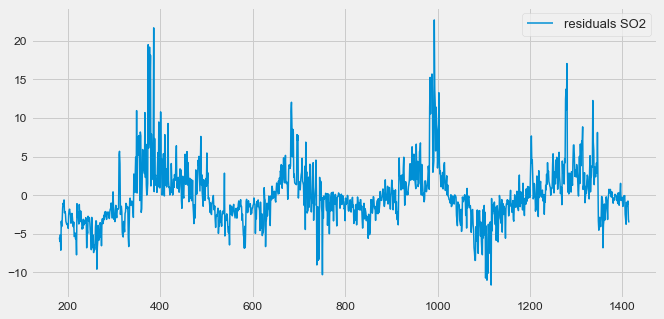

In [361]:
plot_stl_decompose(ts, n, col)


Chi2
Best fitting distribution: lognorm
Best p value: 0.162715340627892
Parameters for the best fit: (1.5291664888180196, 0.0, 1.1942902096210721)


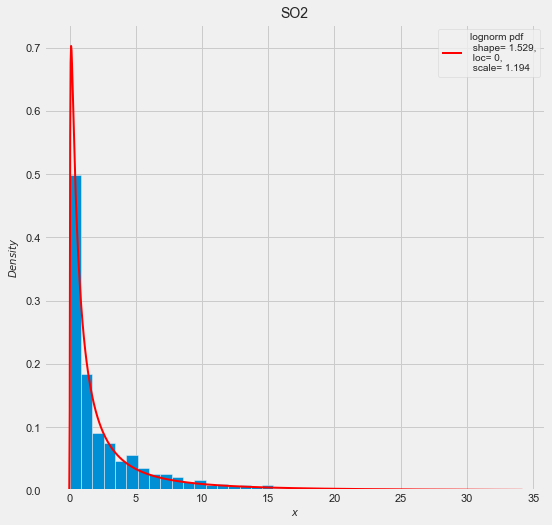

In [383]:
distr_chi2, params_chi2, p_v_chi2 = get_best_distribution(ts)
distr_params_all = defaultdict(dict)
distr_params_all['general'][distr_chi2] = params_chi2
distribution_by_season(df[col], col, distr_params_all['general'])

### PB

In [371]:
col='PB'
ts = df[col]

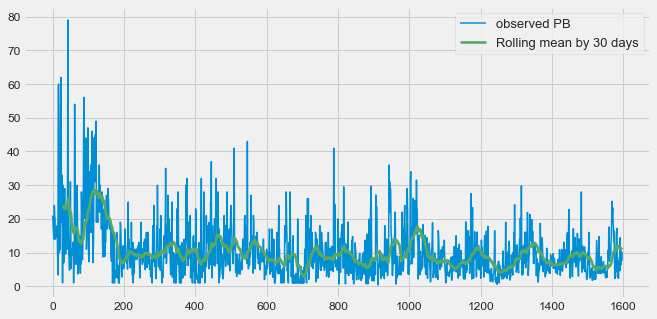

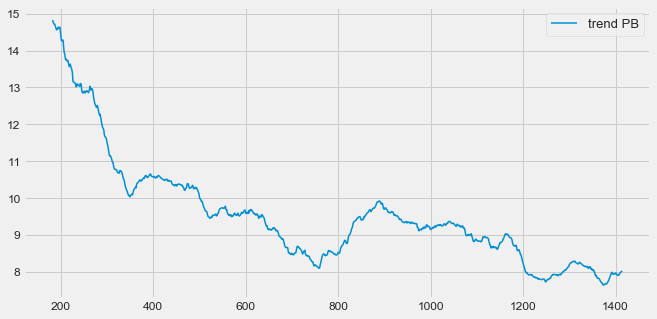

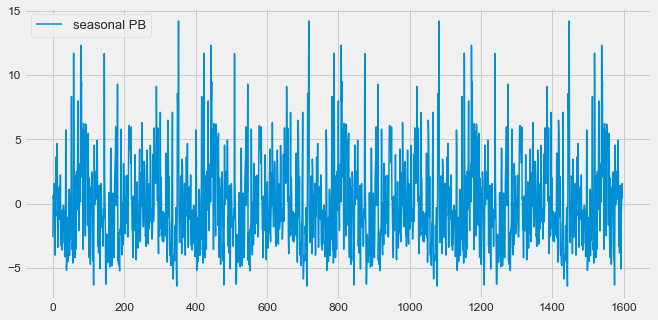

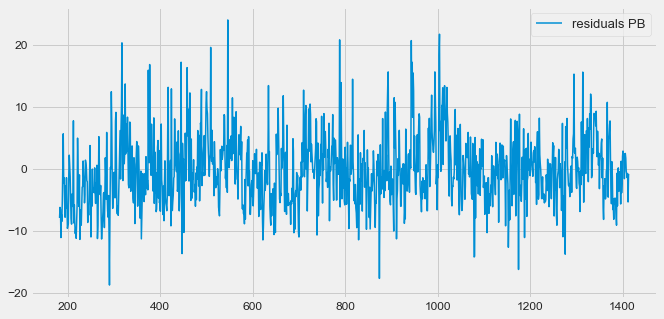

In [363]:
plot_stl_decompose(ts, n, col)


Chi2
Best fitting distribution: lognorm
Best p value: 0.8190017891283098
Parameters for the best fit: (0.8040052443599891, 0.0, 7.781121286288553)


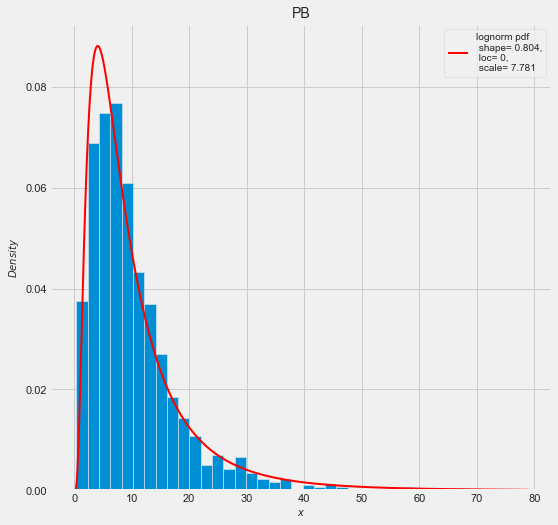

In [322]:
distr_chi2, params_chi2, p_v_chi2 = get_best_distribution(ts)
distr_params_all = defaultdict(dict)
distr_params_all['general'][distr_chi2] = params_chi2
distribution_by_season(df[col], col, distr_params_all['general'])

### CD

In [384]:
col='CD'
ts = df[col]

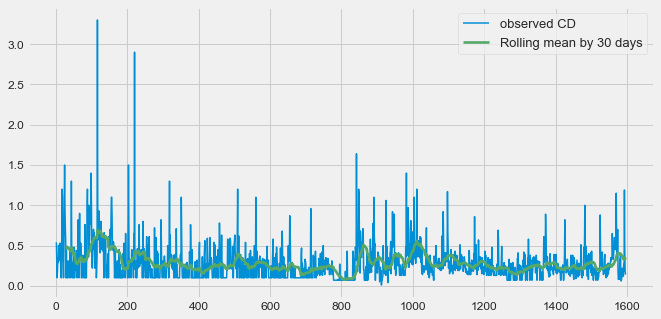

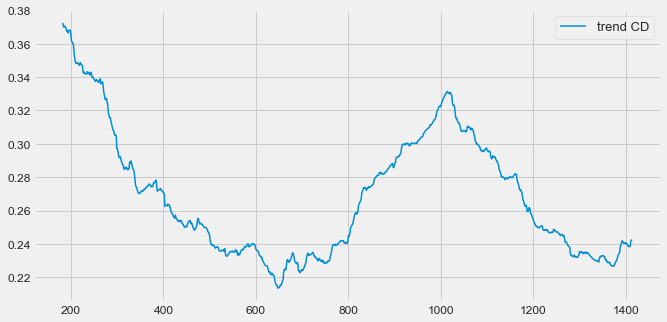

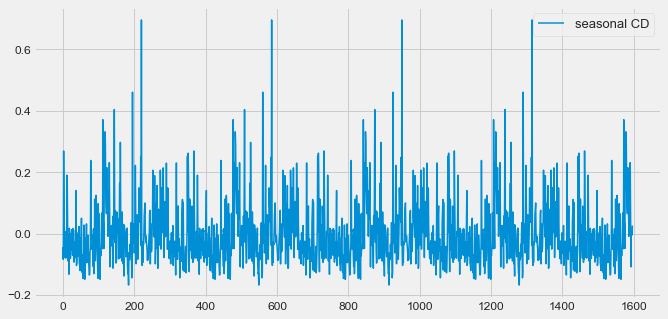

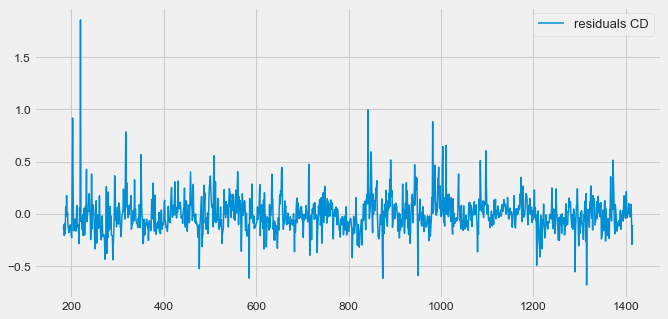

In [365]:
plot_stl_decompose(ts, n, col)


Chi2
Best fitting distribution: gamma
Best p value: 0.4864753740886615
Parameters for the best fit: (1.4643558891277695, 0.03980740850992071, 0.16742576859048147)


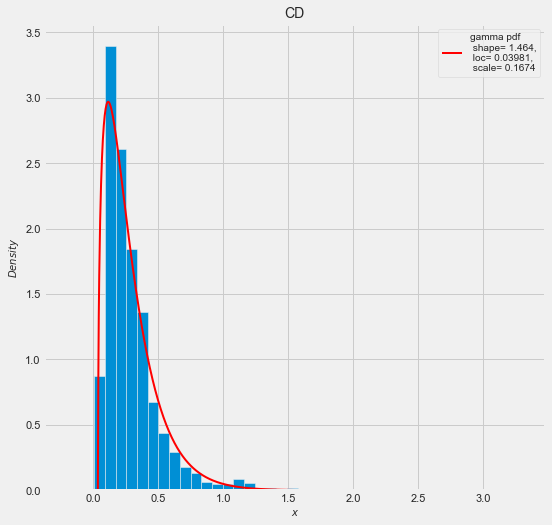

In [380]:
distr_chi2, params_chi2, p_v_chi2 = get_best_distribution(ts)
distr_params_all = defaultdict(dict)
distr_params_all['general'][distr_chi2] = params_chi2
distribution_by_season(df[col], col, distr_params_all['general'])

### Обобщенные характеристики

In [327]:
stat = None
for col in df.columns:
    if stat is None:
        stat = pd.DataFrame(df[col].describe())
    else:
        stat = stat.join(pd.DataFrame(df[col].describe()))
stat

,TSP,SO2,PB,CD
count,1597.000000,1597.000000,1597.000000,1597.000000
mean,39.442392,3.020344,10.307226,0.284163
std,29.401728,4.380079,8.286459,0.234740
min,1.000000,0.005000,0.380000,0.010000
25%,19.000000,0.390000,4.800000,0.120000
50%,34.000000,1.180000,8.150000,0.230000
75%,54.000000,4.010000,13.000000,0.350000
max,316.000000,34.200000,79.000000,3.300000


In [328]:
df.corr(method='pearson')

,TSP,SO2,PB,CD
TSP,1.000000,0.070173,0.350432,0.232816
SO2,0.070173,1.000000,0.399736,0.259740
PB,0.350432,0.399736,1.000000,0.598589
CD,0.232816,0.259740,0.598589,1.000000


In [329]:
df.corr(method='spearman')

,TSP,SO2,PB,CD
TSP,1.000000,0.014706,0.448016,0.314215
SO2,0.014706,1.000000,0.293857,0.186567
PB,0.448016,0.293857,1.000000,0.595115
CD,0.314215,0.186567,0.595115,1.000000
